In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [33]:
digits = load_digits()

In [34]:
dir(digits) # to explore what functions and attributes are available for working with this dataset.

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [35]:
digits.data[0] # this function stores digit images as flattened arrays of pixel values.

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [36]:
# digits - object, data - attribute,
# digits.data[0] is selecting the first row of this 2D array

<Figure size 640x480 with 0 Axes>

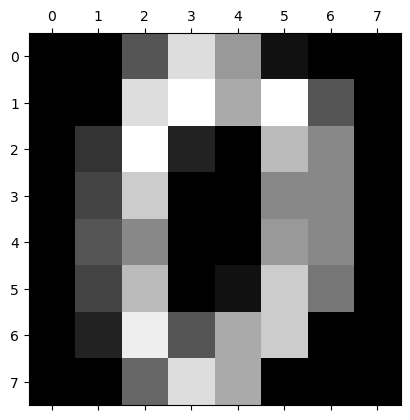

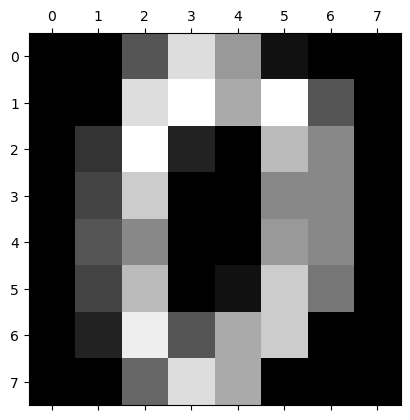

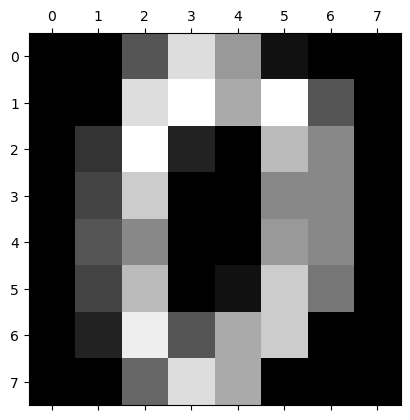

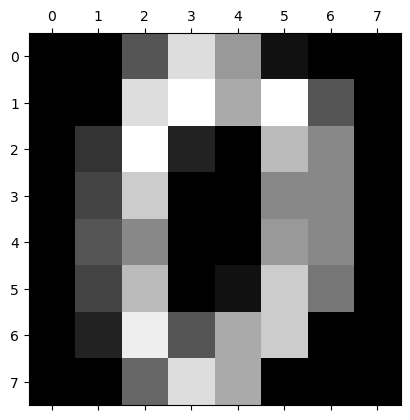

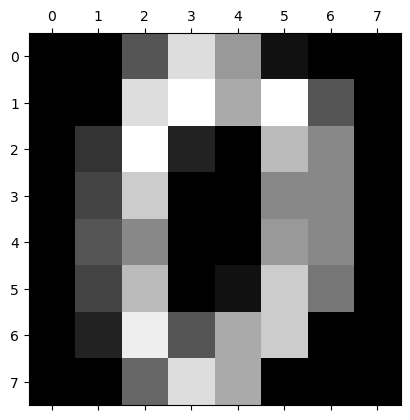

In [37]:
plt.gray() # This line sets the color map to grayscale.
for i in range(5):  
#  - in a sample of 5 numbers
    plt.matshow(digits.images[0]) #plt.matshow-displays the 8x8 pixel image of the handwritten digit in grayscale
# accesses the image of the first handwritten digit in the dataset.

In [38]:
digits.target[0:5] # displays above given numbers

array([0, 1, 2, 3, 4])

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [41]:
len(x_train)

1437

In [42]:
len(x_test)

360

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [44]:
model.fit(x_train, y_train)

/Users/periyzat/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
model.score(x_test, y_test)

0.9638888888888889

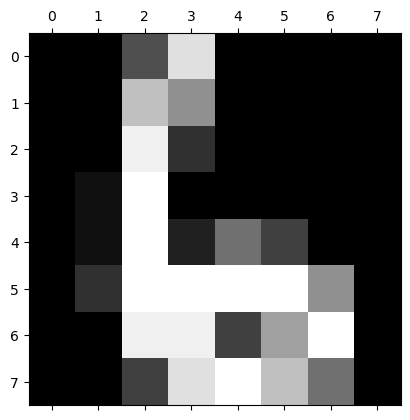

In [47]:
plt.matshow(digits.images[67])

In [48]:
digits.target[67]

6

In [50]:
model.predict([digits.data[67]])

array([6])

In [51]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [52]:
# to know where it is making mistakes or why it is not working 100% accurate, we use "Confusion Matrix"

In [54]:
y_predicted = model.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[38,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 31,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 31,  0,  0],
       [ 0,  3,  0,  0,  1,  0,  0,  0, 31,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 32]])

Text(95.72222222222221, 0.5, 'Truth')

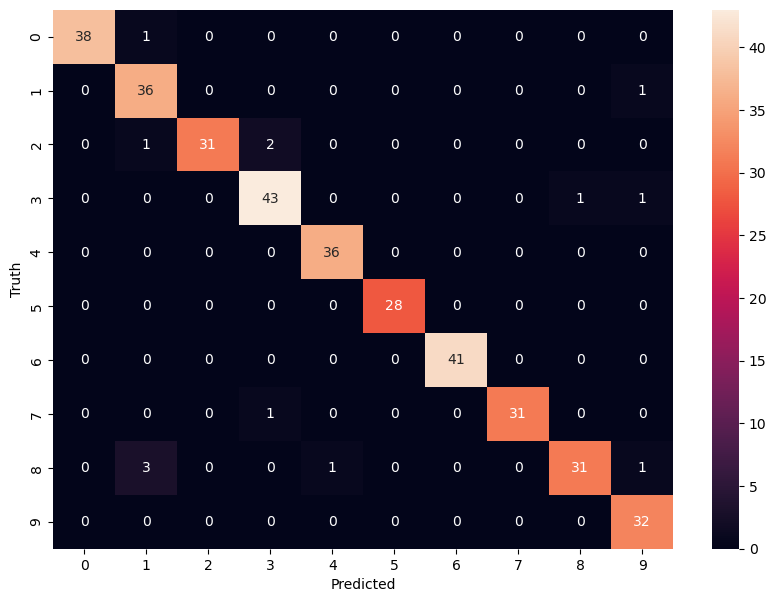

In [56]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')